In [1]:
import pandas as pd

# Carica il dataset
df = pd.read_csv("C:\\Users\\mios9\\Desktop\\ESAME FINALE PYTHON EPICODE\\owid-covid-data.csv")

# Dimensioni del dataset
print("Dimensioni del dataset:")
print(df.shape)

# Metadati del dataset
print("\nMetadati del dataset:")
print(df.info())

Dimensioni del dataset:
(409562, 67)

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409562 entries, 0 to 409561
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409562 non-null  object 
 1   continent                                   389975 non-null  object 
 2   location                                    409562 non-null  object 
 3   date                                        409562 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths

In [26]:
# Elimina le locazioni che non appartengono ad alcun continente
df = df.dropna(subset=['continent'])

# Numero totale di casi per continente
total_cases_per_continent = df.groupby('continent')['total_cases'].sum()
print("Numero totale di casi per continente:")
print(total_cases_per_continent)

Numero totale di casi per continente:
continent
Africa           1.397275e+10
Asia             2.373950e+11
Europe           2.243707e+11
North America    1.210058e+11
Oceania          1.086353e+10
South America    7.012202e+10
Name: total_cases, dtype: float64


In [5]:
import numpy as np

# Dati per i due continenti da confrontare
continent1 = 'Europe'
continent2 = 'Asia'

# Filtra i dati per i due continenti
data_continent1 = df[df['continent'] == continent1]['total_cases']
data_continent2 = df[df['continent'] == continent2]['total_cases']

# Descrittori statistici
stats_continent1 = {
    'numero_massimo_conteggi': np.max(data_continent1),
    'media': np.mean(data_continent1),
    'percentuale_rispetto_al_mondo': np.sum(data_continent1) / df['total_cases'].sum() * 100
}

stats_continent2 = {
    'numero_massimo_conteggi': np.max(data_continent2),
    'media': np.mean(data_continent2),
    'percentuale_rispetto_al_mondo': np.sum(data_continent2) / df['total_cases'].sum() * 100
}

print(f"Descrittori statistici per {continent1}:")
print(stats_continent1)

print(f"Descrittori statistici per {continent2}:")
print(stats_continent2)

Descrittori statistici per Europe:
{'numero_massimo_conteggi': 38997490.0, 'media': 2801516.961143228, 'percentuale_rispetto_al_mondo': 33.10621974066104}
Descrittori statistici per Asia:
{'numero_massimo_conteggi': 99361338.0, 'media': 3388162.303456741, 'percentuale_rispetto_al_mondo': 35.027972259205384}


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='total_cases'>

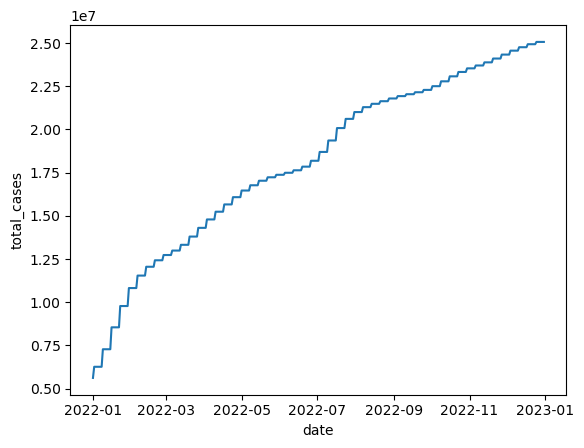

In [11]:
import seaborn as sns
# Converti la colonna 'date' in tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Filtra i dati per l'Italia nel 2022
italy_data_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# Grafico per casi totali rispetto alla data
sns.lineplot(x='date', y='total_cases', data=italy_data_2022)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='new_cases'>

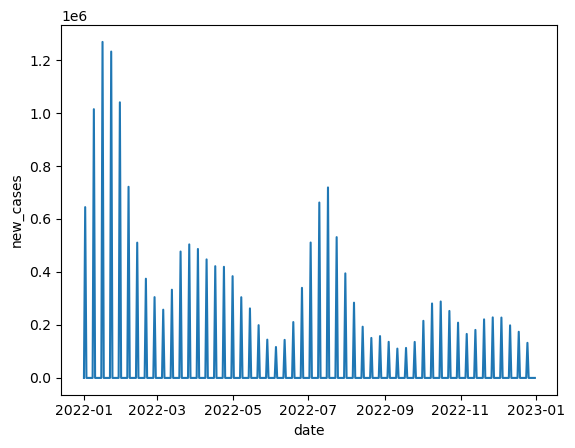

In [12]:
# Grafico per nuovi casi rispetto alla data
sns.lineplot(x='date', y='new_cases', data=italy_data_2022)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date'>

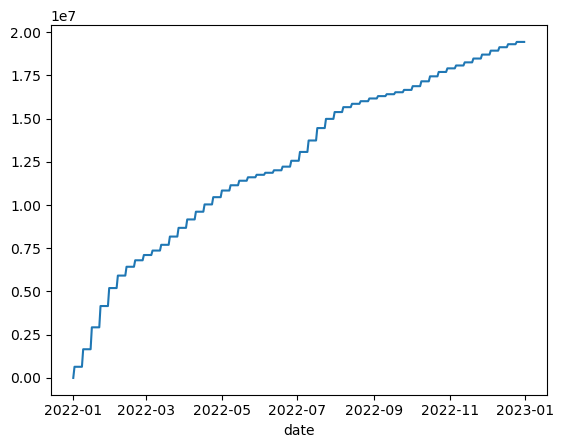

In [13]:
#Grafico per somma cumulativa nuovi casi nel 2022
italy_cumulative_new_cases = italy_data_2022.groupby('date')['new_cases'].sum().cumsum()
sns.lineplot(x=italy_cumulative_new_cases.index, y=italy_cumulative_new_cases.values)

<Axes: xlabel='location', ylabel='icu_patients'>

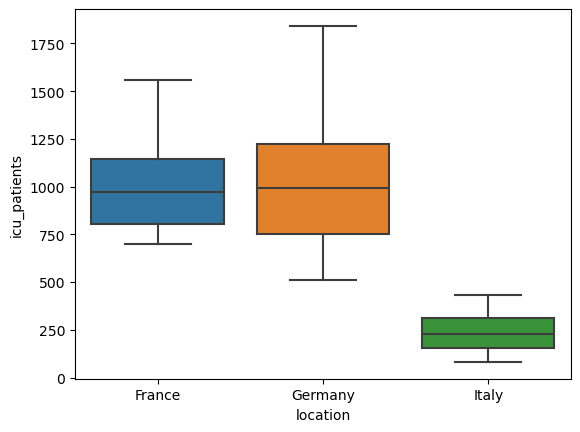

In [15]:
# Filtra i dati per Italia, Germania e Francia da maggio 2022 ad aprile 2023
countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'
filtered_data = df[(df['location'].isin(countries)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Boxplot della differenza per ICU
sns.boxplot(x='location', y='icu_patients', data=filtered_data)

In [25]:
#Analisi Italia, Germania, Francia e Spagna nel 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filtro per paesi e data specificata
filtered_data = df[(df['location'].isin(countries)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

#Somma dei pazienti ricoverati per ciascun paese
sum_hosp_patients = filtered_data.groupby('location')['hosp_patients'].sum()

# Visualizza la somma dei pazienti ricoverati per ogni paese
print("Somma dei pazienti ricoverati per ogni paese nel 2023:")
print(sum_hosp_patients)

# Conteggio dei valori nulli 
null_counts= filtered_data['hosp_patients'].isnull().groupby(filtered_data['location']).sum()

# Visualizza il conteggio dei valori nulli per i pazienti ospitalizzati per ogni paese
print("Conteggio dei valori nulli nelle colonne relative ai ricoveri")
print(null_counts)

#Gestione dati nulli
#La sostituzione dei dati nulli può essere appropriata se i nulli rappresentano dati mancanti occasionali e la loro sostituzione non compromette la veridicità dell'analisi.
#Se i dati nulli sono frequenti e rappresentano una parte significativa del dataset, la sostituzione potrebbe distorcere i risultati. In questi casi, potrebbe essere meglio analizzare il motivo dei nulli e considerare approcci alternativi come l'analisi dei dati con i nulli intatti

Somma dei pazienti ricoverati per ogni paese nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
Conteggio dei valori nulli nelle colonne relative ai ricoveri
location
France     275
Germany    365
Italy        0
Spain      203
Name: hosp_patients, dtype: int64
